In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### Full version working
import pdb, sys, os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import sys
import utils

from pylab import *
from netCDF4 import *

# import pyexcel
import scipy.stats as stats
from scipy.interpolate import griddata
from matplotlib.ticker import AutoMinorLocator

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

<ipython-input-4-b9b90220b977>:363: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])


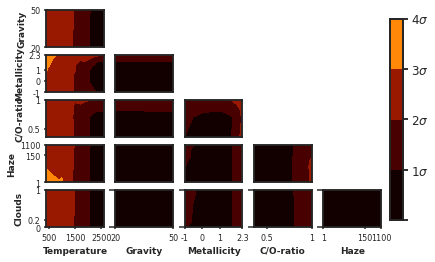

In [4]:
### This program needs mainly 2 input files one containing chi-sq values for each model in the grid and other containing model names. These files will be generated by fitting program.
### user input parameters
planet_chisq_path = "data/tspec_forward_model_corner/"  ### location of calculated chi-sq_values
planet = ["HAT-P-23"]  ## planet name
# planet_fig = ['HAT-P-41'] ## Planet name for the title on plot
# temp = np.array([1315]) ### Temperature from tepcat
######################

for pnt in range(0, 1):  ### Planet Loop Starts here

    planet_grid = str(planet[pnt])

    chi_squared_stat3 = np.loadtxt(
        (planet_chisq_path + str(planet_grid) + "_iso_chi_square_local_GAIA_DR2.out"),
        dtype="float",
        delimiter=",",
    )
    offset_array = np.loadtxt(
        (planet_chisq_path + str(planet_grid) + "_iso_offsetarray_local_GAIA_DR2.out"),
        dtype="float",
        delimiter=",",
    )
    model_name = np.loadtxt(
        (planet_chisq_path + str(planet_grid) + "_iso_model_name_local_GAIA_DR2.out"),
        dtype="str",
        delimiter=",",
    )

    min_chi3 = np.amin(np.amin(chi_squared_stat3, axis=1), axis=0)
    min_index_chi3 = np.argmin(np.amin(chi_squared_stat3, axis=1))
    min_index_chi3_offset = np.argmin(np.amin(chi_squared_stat3, axis=0))
    #print(min_index_chi3_offset)
    # min_chi_offset = offset_array[min_index_chi3]
    # print (min_chi_offset)

    ### Steps to make an array of individual model parameters
    model_parameter = np.zeros((len(model_name), 6), dtype=np.float64)

    for i in range(len(model_name)):
        model_parameter[i, 0] = np.float(model_name[i].split("_")[1])
        model_parameter[i, 1] = np.float(model_name[i].split("_")[2])
        model_parameter[i, 2] = np.float(model_name[i].split("_")[3])
        model_parameter[i, 3] = np.float(model_name[i].split("_")[4])
        model_parameter[i, 4] = np.float(model_name[i].split("_")[5])
        model_parameter[i, 5] = np.float(model_name[i].split("_")[6])

    #### Steps to min chi  Model Parameters individually
    min_chi_model = model_name[min_index_chi3]  ### Name of min_chi_model

    min_chi_temp = np.float(min_chi_model.split("_")[1])
    min_chi_gravity = np.float(min_chi_model.split("_")[2])
    min_chi_metal = np.float(min_chi_model.split("_")[3])
    min_chi_co = np.float(min_chi_model.split("_")[4])
    min_chi_haze = np.float(min_chi_model.split("_")[5])
    min_chi_cloud = np.float(min_chi_model.split("_")[6])

    #### Extending the min chi-square space around the minima starts here
    # chi_value = []
    # chi_index = []
    # spectra_file_name = []
    # offset_index = []
    # for i in range(len(chi_squared_stat3)):
    #  for j in range(len(chi_squared_stat3[0])):
    #    if ((min_chi3 -1) < chi_squared_stat3[i,j] <= (min_chi3+0.001)):
    #
    #     chi_value.append(chi_squared_stat3[i,j])
    #     chi_index.append(i)
    #     offset_index.append(j)
    #     spectra_file_name.append(file_name[i])
    #
    # print (chi_value)
    # print(chi_index)
    # print (offset_index)
    # print (spectra_file_name)
    # print (offset_array[chi_index,offset_index])

    temparray = np.array(
        [
            400,
            600,
            700,
            800,
            900,
            1000,
            1100,
            1200,
            1300,
            1400,
            1500,
            1600,
            1700,
            1800,
            1900,
            2000,
            2100,
            2200,
            2300,
            2400,
            2500,
            2600,
        ],
        dtype="float",
    )
    g_values = np.array([20, 50], dtype="float")
    metalarray = np.array([-1, 0, 1, 1.7, 2, 2.3])
    coarray = np.array([0.35, 0.56, 0.70, 1])
    ray_array = np.array(
        [1, 10, 150, 1100], dtype="float"
    )  ### Float was used to make it with decimal point
    cloud_array = np.array([0, 0.06, 0.2, 1])  ### cloud_bottom

    # temp_metal_matrix= np.zeros((35,2),dtype=np.float64)
    # temp_metal_matrix[0:7,0] = temparray[0]
    # temp_metal_matrix[7:14,0] = temparray[1]
    # temp_metal_matrix[14:21,0] = temparray[2]
    # temp_metal_matrix[21:28,0] = temparray[3]
    # temp_metal_matrix[28:35,0] = temparray[4]
    #
    # temp_metal_matrix[0:7,1] = metalarray[0:7]
    # temp_metal_matrix[7:14,1] = metalarray[0:7]
    # temp_metal_matrix[14:21,1] = metalarray[0:7]
    # temp_metal_matrix[21:28,1] = metalarray[0:7]
    # temp_metal_matrix[28:35,1] = metalarray[0:7]

    plot_xarray = [temparray, g_values, metalarray, coarray, ray_array, cloud_array]
    plot_yarray = [temparray, g_values, metalarray, coarray, ray_array, cloud_array]

    #  plot_name_xarray = ['temparray', 'metalarray', 'coarray', 'ray_array', 'cloud_array']
    #  plot_name_yarray = ['temparray', 'metalarray', 'coarray', 'ray_array', 'cloud_array']

    plot_name_xarray = [
        "Temperature",
        "Gravity",
        "Metallicity",
        "C/O-ratio",
        "Haze",
        "Clouds",
    ]
    plot_name_yarray = [
        "Temperature",
        "Gravity",
        "Metallicity",
        "C/O-ratio",
        "Haze",
        "Clouds",
    ]

    chi_temp_metal = []
    # temp_metal_matrix= np.zeros((35,2),dtype=np.float64)

    for var1 in range(0, 6):  ##or var1 in (0,1,2,3,4,5):
        for var2 in range(var1, 6):  ##for var2 in range(var1, 5):

            #print(var1)
            #print(var2)

            variablex = plot_xarray[var1]
            variabley = plot_yarray[var2]

            #print(variablex)
            #print(variabley)

            variablenamex = plot_name_xarray[var1]
            variablenamey = plot_name_yarray[var2]

            #print(variablenamex)
            #print(variablenamey)

            num = 0

            if var1 == var2:
                continue
            ## Keep everthing as it for two variable system, just change the variable in the loop somehow and store at the end of the loop in new variable
            mapname = np.zeros((len(variablex) * len(variabley), 3), dtype=np.float64)
            for i in range(len(variablex)):
                for j in range(len(variabley)):
                    chi1 = []

                    for model in range(len(model_name)):

                        # print (model_parameter[model,0])
                        # print (temparray[0])

                        if (
                            model_parameter[model, var1] == variablex[i]
                            and model_parameter[model, var2] == variabley[j]
                        ):
                            chi1.append(min(chi_squared_stat3[model, :]))
                            # chi1.append(chi_squared_stat3[model,offset_index[0]]) ### Check offset index for each planet

                            # mapname = (variablenamex + '_' + variablenamey)

                            mapname[num, 0] = variablex[i]
                            mapname[num, 1] = variabley[j]

                    # if (len(chi1) >= 0):
                    #print(j)
                    chi2 = np.amin(chi1)
                    mapname[num, 2] = chi2 - min_chi3  ## we are storing del chi2 not chi2
                    num = num + 1
                    chi_temp_metal.append(chi2)

            #print(mapname)
            del_chi_temp_metal = chi_temp_metal - min_chi3
            #print(len(chi_temp_metal))
            #print(mapname.shape)

            ############### Calculating delta chi contour intervals using confidence internals 68.27%	80.00%	90.00%	95.00%	95.45%	99.00%	99.73%	99.90%	99.99%

            # chi_map = chi_squared_stat3[:,offset_index[0]]
            # print (len(chi_map))

            map_variable_x = mapname[:, 0]  # temp_metal_matrix[:,1]
            map_variable_y = mapname[:, 1]  # temp_metal_matrix[:,0]
            #print(map_variable_x)
            # exit()

#             rc("font", weight="bold")
#             rcParams["axes.linewidth"] = 1
#             # rcParams['figure.figsize'] = (25.0, 15.0)
#             rc("text", usetex=False)  ### TO print underscores and not make them subscripts
#             rc("font", **{"family": "serif", "serif": ["Palatino"]})
#             rc("savefig", dpi=300)
            #### Contour plot
            xi = np.linspace(min(map_variable_x), max(map_variable_x), 100)
            yi = np.linspace(min(map_variable_y), max(map_variable_y), 100)
            # Z = np.random.random_sample((42))*3

            Z_interp = griddata(
                (map_variable_x, map_variable_y),
                mapname[:, 2],
                (xi[None, :], yi[:, None]),
            )
            #print(Z_interp)

            # levels = [25, 30, 35, 40, 45]
            # levels = [0, 2.30, 3.22, 4.61,	5.99,	6.18,	9.21,	11.83,	13.82,	19.33]
            levels = [
                0,
                2.30,
                6.18,
                11.83,
                19.33,
            ]  ## how many free parameters were used to calcualte these intervals fro the big chisquare  table.
            fig = matplotlib.pyplot.figure(1)
            #print(var1)
            #print(var2)
            plt.subplot2grid((5, 5), (var2 - 1, var1))

            #    if (var1 == 3):
            #     line2 = contourf(xi, yi, Z_interp, locator=ticker.LogLocator(), levels) # levels, colors=('r', 'g', 'b', 'k'))
            #    elif (var2 >= 3):
            #     line2 = contourf(xi, yi, Z_interp, locator=ticker.LogLocator(), levels)
            #    else :
            line2 = contourf(
                xi, yi, Z_interp, levels, cmap="afmhot", vmin=0, vmax=30
            )  ### vmax has been changed from 19.33 to 25 to make end darker
            # line2 = contourf(xi, yi, Z_interp, levels)
            # plt.colorbar(line2)
            # plt.clabel(line2, inline=1, fontsize=10) ### To add contour numbers in the plots also makes it look bit messy so removed

            if var1 == 4:
                plt.xscale("log")
            if var2 == 4:
                plt.yscale("log")
            if var2 == 5:
                plt.yscale("symlog")

            #### Probability plot
            # line3 = plot(chi_squared_stat3.ravel()[:],prob[:])
            # plt.setp(line3, linestyle='-',linewidth=4.0)
            ####
            if var2 == 5:
                xlabel(variablenamex, fontsize=9, fontweight="bold")
            # xlim(0,5000)
            if var1 == 0:
                ylabel(variablenamey, fontsize=9, fontweight="bold")

                #### Contour plot ends
            tick_params(axis="x", labelsize="8")
            tick_params(axis="y", labelsize="8")
            ax = gca()
            ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

            if planet_grid == "HD_209458":
                plt.suptitle("HD-209458b", fontsize=25, fontweight="bold")
            elif planet_grid == "HD_189733":
                plt.suptitle("HD-189733b", fontsize=25, fontweight="bold")
            # else:
            # plt.suptitle(planet_fig[pnt]+'b',fontsize=25,fontweight='bold')

            ax.xaxis.set_major_formatter(FormatStrFormatter("%g"))
            ax.yaxis.set_major_formatter(
                FormatStrFormatter("%g")
            )  ## removes unwanted zeros in xticks
            ax.tick_params(which="both", width=1.5)
            ax.tick_params(which="major", length=2)

            ### reducing tick interval for temperature and coratio on x axis manually for plots needed in paper
            if var1 == 0 and var2 == 5:
                majorLocator = FixedLocator([500, 1500, 2500])
                ax.xaxis.set_major_locator(majorLocator)
            if var1 == 0 and var2 != 5:
                majorLocator = FixedLocator([])
                ax.xaxis.set_major_locator(majorLocator)
            if var1 == 1 and var2 == 5:
                majorLocator = FixedLocator([20, 50])
                ax.xaxis.set_major_locator(majorLocator)
            if var1 == 1 and var2 != 5:
                majorLocator = FixedLocator([])
                ax.xaxis.set_major_locator(majorLocator)
            if var2 == 1 and var1 == 0:
                majorLocator = FixedLocator([20, 50])
                ax.yaxis.set_major_locator(majorLocator)
            if var2 == 1 and var1 != 0:
                majorLocator = FixedLocator([])
                ax.yaxis.set_major_locator(majorLocator)
            if var1 == 2 and var2 == 5:
                majorLocator = FixedLocator([-1, 0, 1, 2.3])
                ax.xaxis.set_major_locator(majorLocator)
            if var1 == 2 and var2 != 5:
                majorLocator = FixedLocator([])
                ax.xaxis.set_major_locator(majorLocator)
            if var2 == 2 and var1 == 0:
                majorLocator = FixedLocator([-1, 0, 1, 2.3])
                ax.yaxis.set_major_locator(majorLocator)
            if var2 == 2 and var1 != 0:
                majorLocator = FixedLocator([])
                ax.yaxis.set_major_locator(majorLocator)
            if var1 == 3 and var2 == 5:
                majorLocator = FixedLocator([0.2, 0.5, 1])
                ax.xaxis.set_major_locator(majorLocator)
            if var1 == 3 and var2 != 5:
                majorLocator = FixedLocator([])
                ax.xaxis.set_major_locator(majorLocator)
            if var2 == 3 and var1 == 0:
                majorLocator = FixedLocator([0.2, 0.5, 1])
                ax.yaxis.set_major_locator(majorLocator)
            if var2 == 3 and var1 != 0:
                majorLocator = FixedLocator([])
                ax.yaxis.set_major_locator(majorLocator)
            if var1 == 4 and var2 == 5:
                majorLocator = FixedLocator([1, 150, 1100])
                ax.xaxis.set_major_locator(majorLocator)
            if var1 == 4 and var2 != 5:
                majorLocator = FixedLocator([])
                ax.xaxis.set_major_locator(majorLocator)
            if var2 == 4 and var1 == 0:
                majorLocator = FixedLocator([1, 150, 1100])
                ax.yaxis.set_major_locator(majorLocator)
            if var2 == 4 and var1 != 0:
                majorLocator = FixedLocator([])
                ax.yaxis.set_major_locator(majorLocator)
            if var2 == 5 and var1 == 0:
                majorLocator = FixedLocator([0, 0.2, 1])
                ax.yaxis.set_major_locator(majorLocator)
            if var2 == 5 and var1 != 0:
                majorLocator = FixedLocator([])
                ax.yaxis.set_major_locator(majorLocator)
            ### Remember axes might be different so just shift things up and down to make labels,ticks etc. work.

            ### seperate axis for colorbar
            cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
            cbar = fig.colorbar(line2, cax=cbar_ax)  # cmap='afmhot' )
            cbar.set_ticklabels(
                ["", r"$1 \sigma$", r"$2 \sigma$", r"$3 \sigma$", r"$4 \sigma$"],
                update_ticks=True,
            )
            # cbar_ax.set_ylabel
            tick_params(labelsize="12")
            ###########################################
    #plt.savefig("corner_local_GAIADR2" + str(planet[pnt]) + ".pdf", bbox_inches="tight")
    utils.savefig("../paper/figures/tspec_forward_model_corner/tspec_forward_model_corner.pdf")
# show()